In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import math

# Lecture 2: Noise processes and measurement sensitivity

!!! success "Expected prior knowledge"

    Before the start of this lecture, you should be able to:

    - write down the relation between the autocorrelation function and the power spectral density
    - describe the power spectral density of white and 1/f noise processes 

!!! summary "Learning goals"

    After this lecture you will be able to:

    - describe the Poissonian and Gaussian probability distributions and argue when they arise
    - relate the noise power spectral density of a sensor to its ability to detect a small signal

Where does noise come from?

In general, noise is caused by processes we don't know about, or at least don't 
know enough about to predict. A good example of this is the Brownian motion
of a particle in a liquid, which for the right type of particle, one can even
see in a microscope.

Due to random collisions with molecules in the liquid, the particle experiences
a randomly fluctuating force: it experiences "force noise", and undergoes random
motion in time.

![](figures/2/drift_force_sketch.PNG){: style="width:300px"}

What makes these collision events "random"? Newton's laws certainly are not random.
The events are random because we do not have the information needed to predict them: 
we would need to know the positions and velocities of all the molecules
in the liquid. If there are many molecules (large N) and we cannot measure
fast enough to observe the motion of the particle in-between collisions then
the particle's motion will look random. If we furthermore neglect the time correlations 
of the motion of the molecules in the liquid, we can describe the random force acting on our particle 
by the autocorrelation function

$$
R_{FF}(\tau) \propto \delta(\tau) \rightarrow S_{FF}(\omega) = \, \text{Constant (white noise)}
$$

For such random behavior, what is the probability that if we look at a certain 
time, we will find the particle at a given position? In other words, what is the probability
density function $p(x)$?

In the previous lecture, we drew some cartoons of such distributions with a shape
that looked like a Bell curve, corresponding to a Gaussian probability 
distribution (also called a "normal" distribution):
$$
p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

![](figures/2/gaussian_fwhm.PNG){: style="width:300px"}

This is a very commonly observed distribution function (hence the name "normal").
The reason it is so common is due to the Central Limit Theorem. This theorem tell us that if we

1. collect a large number of independent (uncorrelated) observations/measurements of a statistical quantity  
2. calculate the average of these observations
3. repeat steps 1-2 many times to create a collection of averages 

then the distribution of the averages will always converge to a Gaussian 
(normal) distribution in the large $N$ limit. More generally, the central limit theorem 
tells us that the probability distribution of the sum of many stochastic variables will converge to a Gaussian. 

**Example: 1D random walk**

We consider a particle on a discrete 1D grid. We repeatedly flip a coin and move
the particle left or right by one step depending on the outcome of the coin
flip. This generates a simplified version of the Brownian motion of a particle. 
The final position of the particle will be given by the net number of steps in a
particular direction. 

The probability of finding the particle at a certain final position after $N$ coin flips 
is described by a Binomial distribution. When $N$ is large, this 
distribution converges to a Gaussian as described by the central limit theorem.

Note that this is an "unconfined" random walk: the longer we wait (i.e., the larger the number of coin flips $N$),
 the larger the standard deviation of the distribution will become.
We will later also look at the case of a harmonic oscillator. Here the "walk"
of the particle is confined by the walls of the potential: the distribution
is still Gaussian but now static in time with a width that depends on the 
average (thermal) energy.

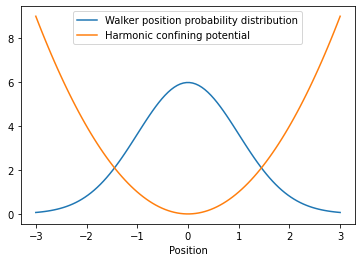

In [2]:
ts = np.linspace(-3,3,100)
def gaussian(ts, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (ts - mu)**2 / (2 * sigma**2))
plt.plot(ts, 15*gaussian(ts, 0, 1), label="Walker position probability distribution")
plt.plot(ts, [t**2 for t in ts], label="Harmonic confining potential")
plt.legend()
plt.xlabel("Position")
plt.show()

**Example: Poisson disribution**

If events occur randomly in time at a constant average rate $\lambda$, then the Poisson distribution describes the probability of observing a particular number of events within a time interval $T$. On average, we expect
to observe $\mu = \lambda T$ events within this time interval. The probability for observing $n$ events within $T$ is given by
$$
P(n) =  \frac{\mu^n}{n!} e^{-\mu} 
$$

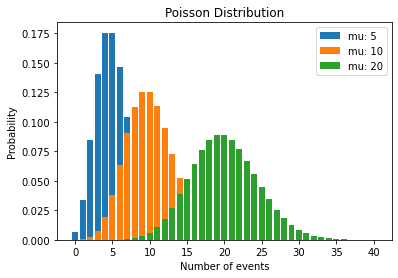

In [3]:
ns = np.linspace(0,40,41)
def poisson(ns, mu):
    return (np.power(mu, ns) / scipy.special.factorial(ns))*np.exp(-mu)
plt.bar(ns, poisson(ns, 5), label="mu: " + str(5))
plt.bar(ns, poisson(ns, 10), label="mu: " + str(10))
plt.bar(ns, poisson(ns, 20), label="mu: " + str(20))
#plt.plot(ns, poisson(ns, 5), label="mu: " + str(5))
#plt.plot(ns, poisson(ns, 10), label="mu: " + str(10))
#plt.plot(ns, poisson(ns, 20), label="mu: " + str(20))
plt.title("Poisson Distribution")
plt.ylabel("Probability")
plt.xlabel("Number of events")
plt.legend()
plt.show()

An example of Poissonian noise is the "shot noise" of a laser: a laser emits photons with a certain average rate $\lambda$ that is proportional to the average laser power. Because the individual photon emission events occur randomly in time, the probability of emitting $n$ photons in a time $T$ follows a Poisson distribution parametrized by $\mu=\lambda T$. The standard deviation of such a Poisson distribution is $\sqrt{\mu}$. 

How can we calculate the fluctuations in the laser power caused by the probabalistic nature of the photon emission events? We know that the standard deviation of the number of emitted photons is $\sqrt{\mu}$. We also know that the average laser power is given by the average photon emission rate times the energy of a photon $\hbar\omega$:
$$
P = \mu \frac{\hbar \omega_0}{T}
$$
The fluctuations in $P$ are due to the fluctations in $\mu$:
$$
\sigma_P = \sqrt{\mu}\frac{\hbar \omega_0}{T} = \sqrt{\frac{P\hbar \omega}{T}} 
$$
To determine the laser's power spectral density, we measure the laser power repeatedly, each time for a time $T$. The measured value will fluctuate with a standard deviation $\sigma_P$. Our measurement bandwidth is given by the sample frequency $\frac{1}{T}$. We can thus calculate the power spectral density of the laser power:
$$
S_{pp} = \frac{P \hbar \omega_0}{T} \cdot \frac{T}{1} = 
P \hbar \omega_0 \quad \big( \text{Watts}^2 / \text{Hz} \big)
$$
![](figures/2/delta_spp.PNG){: style="width:300px"}

## Noise in sensors

So far, we have been talking about noise in a measurement.  In sensing, 
typically one measures the "thing" we want to sense by translating it into
a signal that one can record, like a voltage or a current.  The device that
converts the quantity that we want to measure, such as the position of an object
or the power of a laser, into an observable signal is called a "sensor":

![](figures/2/sensor.PNG){: style="width:500px"}

A sensor often produces an output that is linearly proportional to the
input:

$$
V = R_{vx} x \quad R_{vx} = \frac{dV}{dx}
$$

Here, we have defined a constant $R_{vx}$ as the conversion factor, sometimes called
"transduction gain", or also the "responsivity".  

How sensitive is our sensor?  A common mistake is to associate $R$ with the
sensitivity, as in: "A photodetector with a larger Amps/Watt conversion factor is
more sensitive".

If we define "sensitivity" as the ability to distinguish a small signal from 
the noise, then we can see that this is nonsense!

Why?  Because our ability to distinguish signals from noise *also* depends on
how much noise we have in the reading of our sensor: what we care about is the
equivalent $\sigma_x$ given the amount of noise $\sigma_v$ we have in our
recorded data. For the linear sensor described above, these are related as

$$
\sigma_x = \frac{\sigma_v}{R_{vx}} = \frac{\sigma_v}{dV/dx}
$$

The sensitivity of our detector is determined by the power spectral density
of its noise

$$
S_{xx} = \frac{S_{vv}}{(R_{vx})^2}
$$

Typically, when discussing sensors, people prefer to work with "sensitivity"
defined as:

$$
\sqrt{S_{xx}} = \frac{\sqrt{S_{vv}}}{R_{vx}}
$$

For a sensor of position, the sensitivity $\sqrt{S_{xx}}$ has units of 
m/$\sqrt{Hz}$.  What does $\sqrt{S_{xx}}$ tell us?  If $\sqrt{S_{xx}}$ =
1nm/$\sqrt{Hz}$, then it means if we average for 1 second, we will be able to
detect a 1nm displacement signal with a signal to noise (SNR) ratio of 1:
 
![](figures/2/sensor_noise.PNG){: style="width:500px"}

One slightly confusing point: better sensitivity is *smaller* $\sqrt{S_{xx}}$.

One last point: what if the relation between $x$ and $V$ is not linear? If the 
noise is small compared to the signal, then we can use the rules of error
propagation to find the conversion of $\sigma_v$ into $\sigma_x$:

$$
V = f(x)\\
\sigma_v = \frac{df}{dx} \sigma_x
$$

It looks similar, but now the derivative may be dependent on the average value
of $x$ (i.e. not just constant).

Conclusions:

- The central limit theorem tells us that the probability distribution of an infinite sum of independent random variables is Gaussian  
- A Poissonian probability distribution arises when events happen independently
- The sensitivity of a detector is limited by the power spectral density of the detector noise 

# Homework Lecture 2

## Exercise: Shot noise limit of a Fabry-Perot interferometer

In this exercise, you will calculate the fundamental limit from the (quantum) <a href=https://en.wikipedia.org/wiki/Shot_noise#Optics>shot noise</a> of a laser for detecting the position of an object using a <a href=https://en.wikipedia.org/wiki/Fabry–Pérot_interferometer>Fabry-Perot interferometer</a>.

In its simplest form, a Fabry-Perot interferometer consists of two mirrors:

![](figures/2/fabry_perot.png){: style="width:500px"}

The first mirror is partially transmitting to allow light into the interferometer. The second mirror, in our case, will be the object whose position we want to detect. 

If the total length of the cavity is a multiple of $\lambda / 2$, the cavity will achieve the resonance condition and then there will be a minimum of the reflected light. In the simplest case, (a finesse of 1, corresponding  to "one bounce" of the light inside the cavity), this is equivalent to  the phenomenon of thin film  inteference: 

https://en.wikipedia.org/wiki/Thin-film_interference

In the best case scenario (corresponding to the maximum <a href=https://en.wikipedia.org/wiki/Interferometric_visibility>visibility</a> in which the fixed  and moving mirror have the same reflectance),  the total reflectance $R$ of the cavity as a function of the distance to the object will have the form of a sinusoidal oscillation with a maximum reflectance $R_{max} = 0.5$ and a minimum $R_{min} = 0$:

![](figures/2/reflectance.png){: style="width:500px"}

To detect changes in the position of the object, one shines a laser into the cavity and detects the power of the laser light that is reflected. By adjusting the first mirror to the correct position so that the interferometer is on the "slope of the fringe", as illustrated above, any change in the cavity length will result in a change of the reflected light due to the slope $dR/dx$. In this way, tiny changes of the position of the object can be translated to large changes in the laser power detected by the photodiode. 

(a) Find the value of largest slope $dR/dx$, assumign $R_{max}$ = 0.5 and $R_{min} = 0$. 

(b) Find an expression for the responsivity $R_{xP}$ that relates the changes in the measured laser power to changes in position. 

(c) Consider a laser with a 633 nm wavelength and with an output power of 10 mW, and assume that the noise detected in the photodiode is limited by the photon shot noise of the laser. Under these assumptions, calculate the shot-noise-limited "position sensitivity" $\sqrt{S_{xx}}$ of the interferometer. 

(d) If one had such an inteferometer, how long would one have to average for to detect a displacement $\Delta x$ of the mirror corresponding to the diameter of a proton with a singal-to-noise ratio (SNR) of 1? (ie. for which integration time is $\sigma_x$ equal to the diameter of a proton?) 
